Resultados inseridos no MySQL com sucesso!
Conexão ao MySQL encerrada.
Conexão ao MySQL encerrada.


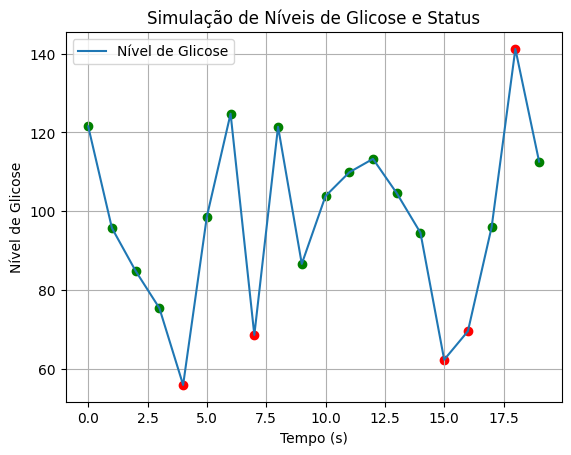

In [13]:
import time
import numpy as np
import mysql.connector
from mysql.connector import Error
import matplotlib.pyplot as plt

# Função para simular a coleta de dados de glicose
def simulate_glucose_collection(duration, sample_interval):
    num_samples = int(duration / sample_interval)
    
    # Gerando dados realistas de níveis de glicose usando uma distribuição normal
    mean_glucose = 100
    std_dev_glucose = 20
    glucose_levels = np.random.normal(mean_glucose, std_dev_glucose, num_samples)

    # Definindo limites para determinar se os níveis de glicose são aceitáveis ou não
    lower_limit = 70
    upper_limit = 140

    # Classificando os níveis de glicose como aceitáveis ou não com base nos limites
    glucose_status = ['Aceitável' if lower_limit <= level <= upper_limit else 'Não Aceitável' for level in glucose_levels]

    return glucose_levels, glucose_status

# Função para inserir os resultados da simulação no banco de dados MySQL
def insert_results_into_mysql(glucose_levels, glucose_status):
    connection = None
    try:
        connection = mysql.connector.connect(host='localhost',
                                             database='glicose',
                                             user='nogueira',
                                             password='1234')
        cursor = connection.cursor()

        for i, (level, status) in enumerate(zip(glucose_levels, glucose_status)):
            query = "INSERT INTO resultados_coleta_glicose (tempo, nivel_glicose, status_glicose) VALUES (%s, %s, %s)"
            cursor.execute(query, (i, float(level), status))  # Convertendo level para float

        connection.commit()
        print("Resultados inseridos no MySQL com sucesso!")

    except Error as e:
        print(f"Erro ao inserir resultados no MySQL: {e}")

    finally:
        if connection is not None and connection.is_connected():
            cursor.close()
            connection.close()
            print("Conexão ao MySQL encerrada.")


# Função para obter os resultados da simulação do banco de dados MySQL
def get_results_from_mysql():
    connection = None
    try:
        connection = mysql.connector.connect(host='localhost',
                                             database='glicose',
                                             user='nogueira',
                                             password='1234')
        cursor = connection.cursor()

        query = "SELECT tempo, nivel_glicose, status_glicose FROM resultados_coleta_glicose ORDER BY tempo"
        cursor.execute(query)

        results = cursor.fetchall()
        return results

    except Error as e:
        print(f"Erro ao obter resultados do MySQL: {e}")

    finally:
        if connection is not None and connection.is_connected():
            cursor.close()
            connection.close()
            print("Conexão ao MySQL encerrada.")

# Função para gerar o gráfico dos resultados
def plot_results(results):
    tempo = [tempo for tempo, _, _ in results]
    nivel_glicose = [nivel for _, nivel, _ in results]
    status_glicose = [status for _, _, status in results]

    plt.plot(tempo, nivel_glicose, label='Nível de Glicose')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Nível de Glicose')
    plt.title('Simulação de Níveis de Glicose e Status')
    plt.legend()

    # Colorindo os pontos no gráfico com base no status da glicose
    for t, level, status in zip(tempo, nivel_glicose, status_glicose):
        color = 'green' if status == 'Aceitável' else 'red'
        plt.scatter(t, level, color=color)

    plt.grid(True)
    plt.show()

# Simulação da coleta de dados de glicose por 60 segundos com intervalo de 3 segundos entre as amostras
glucose_levels, glucose_status = simulate_glucose_collection(60, 3)

# Inserindo os resultados da simulação no banco de dados
insert_results_into_mysql(glucose_levels, glucose_status)

# Obtendo resultados do banco de dados e gerando o gráfico
results = get_results_from_mysql()
plot_results(results)
